# Algorithmic Trading System Demonstration

This project is being developed for short-term stock price forecasting with collaboration between Langara College, Okanagan College and University of Paris East Creteil. It is inteded to make it easy to analyze historical stock data and train a machine learning model to generate accurate predictions for selected stocks. The project is divided into three categories:
1. Data warehouse with automated data extraction, transformation, and loading of trading data from multiple sources: An OLTP database is developed using processes to collect trading data and transforming to for use in training the machine learning algorithm.
2. A machine leaning model for short-term algorithmic trading forecast: Traditionally, stock price prediction uses technical and fundamental analysis, which has its shortcomings. With adding sentiment analysis to the mix, it is possible to develop a generalized algorithm that can be applied to any stock, future, or traded commodity. Machine learning algorithms such as neural networks, random forecasts, support vector regression, XGBoost, and long short-term memort (LSTM) were evaluated and XGBoost was chosen for further development based on performance analysis.
3. Automation for assessment of algorithmic short-term trading strategies.

In this demonstration, we will analyze the collected data, the transformation process for preparing data to train the ML model, training the ML model, and the prediction accuracy based on several metrics, along with computational performance metrics. 


## Database Exploratory Analysis

In this section, we will look at the historical data for stocks, indexes, commodities, and bonds. The database provides fast and easy access to the required trading data for analysis.  
Begin by loading the following notebook.

In [1]:
%%capture
%run ./DatabaseExplore.ipynb

### Load bonds, commodities and index data from database

The database contains historical data for the past five years  

**Fetch the required data from the database:**  
Choose the date range for which you need to analyze the data for. (Format: YYYY-MM-DD)  
Add the stock symbols in the 'symbols' list to choose stocks (case sensitive)  
*[List of stocks](./stocksList.ipynb)*  

For indexes, commodities, and bonds, all the data will be fetched for this demonstration.

In [ ]:
# Input parameters
start_date = '2021-06-28'
end_date = '2024-06-27'
symbols = ['AAPL','NVDA','MSFT','CSCO','AMZN','GOOGL']

# Fetch from database
indexes, commodities, bonds = getCommodities(start_date, end_date)
stocks, topStocks = getStocks(symbols, start_date, end_date)

### Plot indices graph

The database contains data for the following indexes:  
1. S&P 500
2. NASDAQ Composite
3. Dow Jones Industrial Average
4. Russell 3000
5. FTSE 100

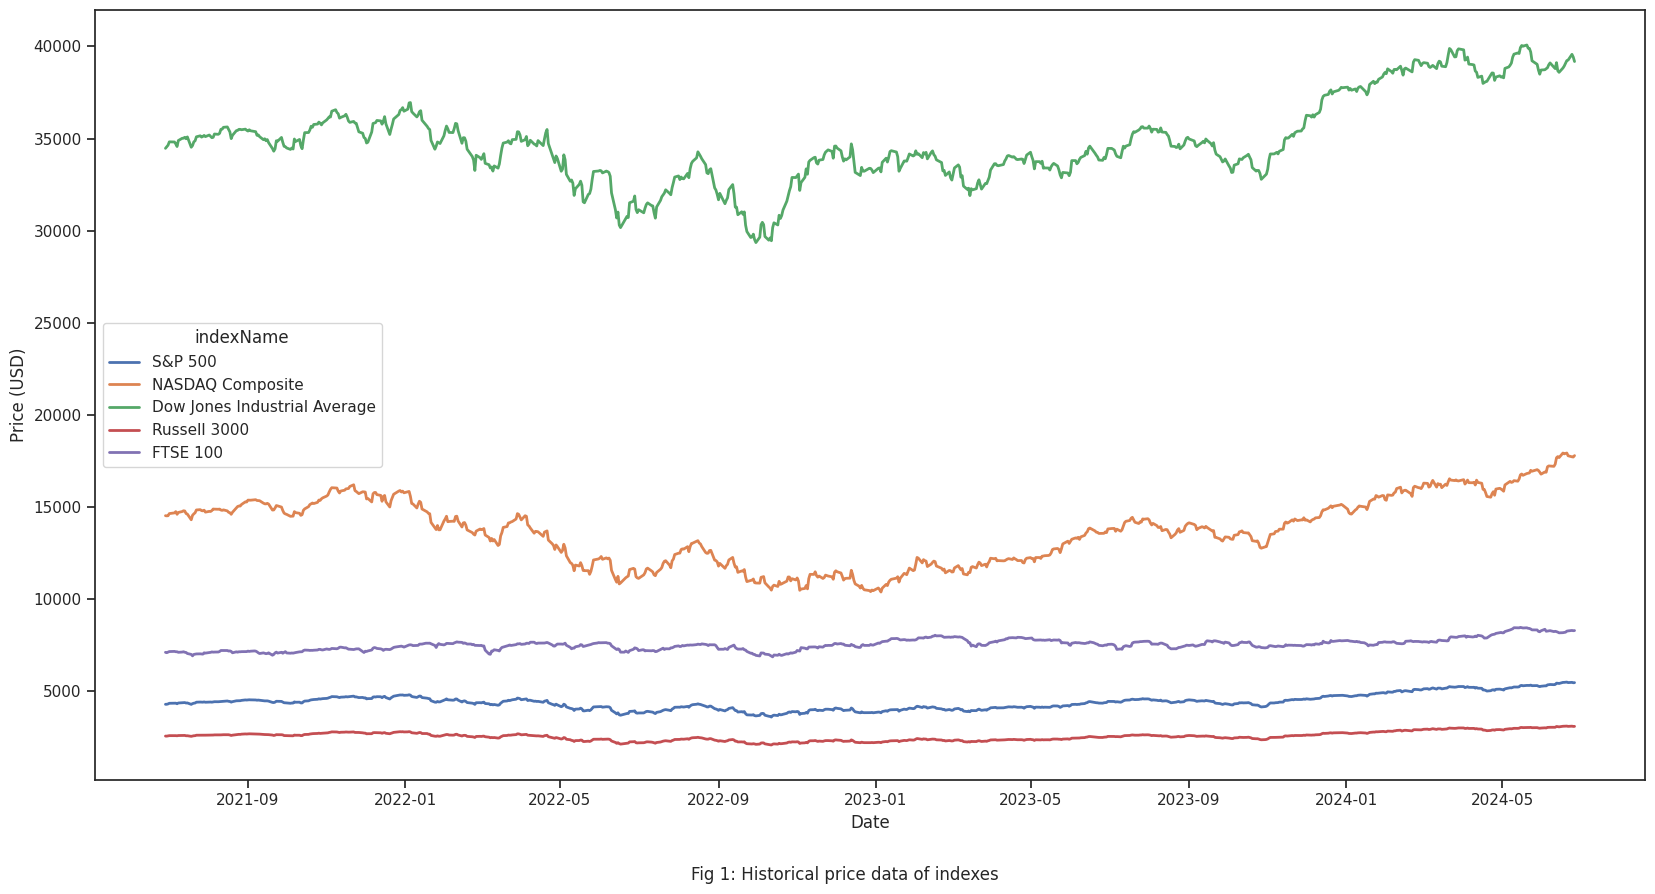

In [3]:
plotIndexes(indexes)

### Plot commodities graph

The database contains data for the following commodities:  
1. Copper
2. Crude Oil
3. Gold Futures
4. Silver Futures
5. Natural Gas
  
Due to the disparities between price ranges, a logarithmic Y-scale is used for easier comparison.

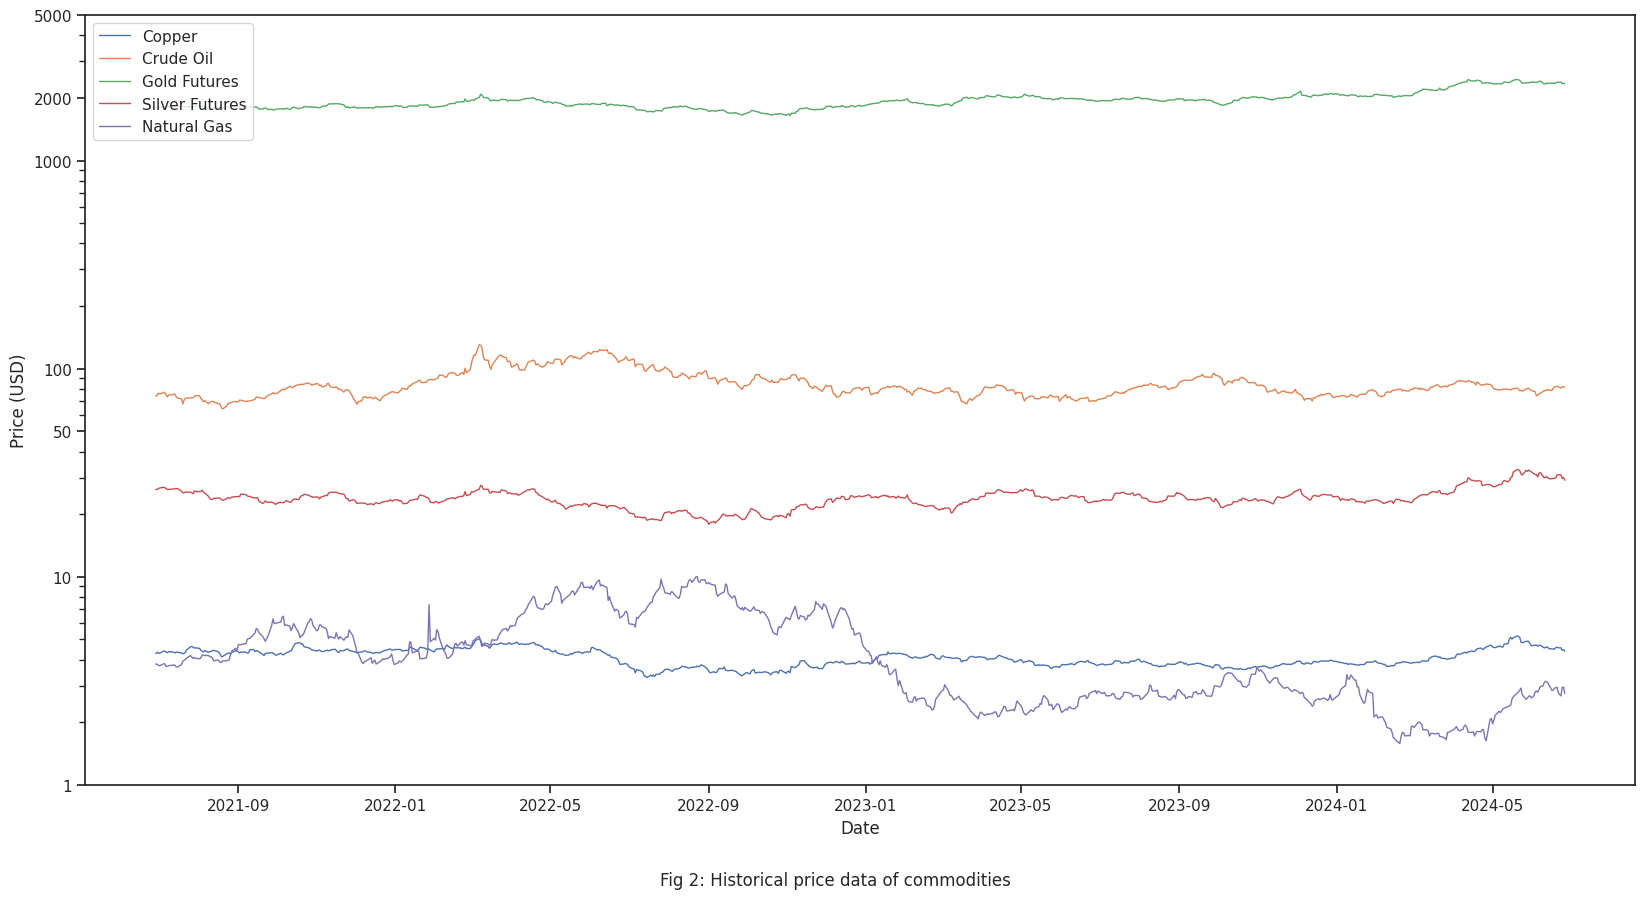

In [4]:
plotCommodities(commodities)

### Plot bonds graph

The database contains data for the maturities of the US Treasury bond. The maturities range between 1 month and 30 years.

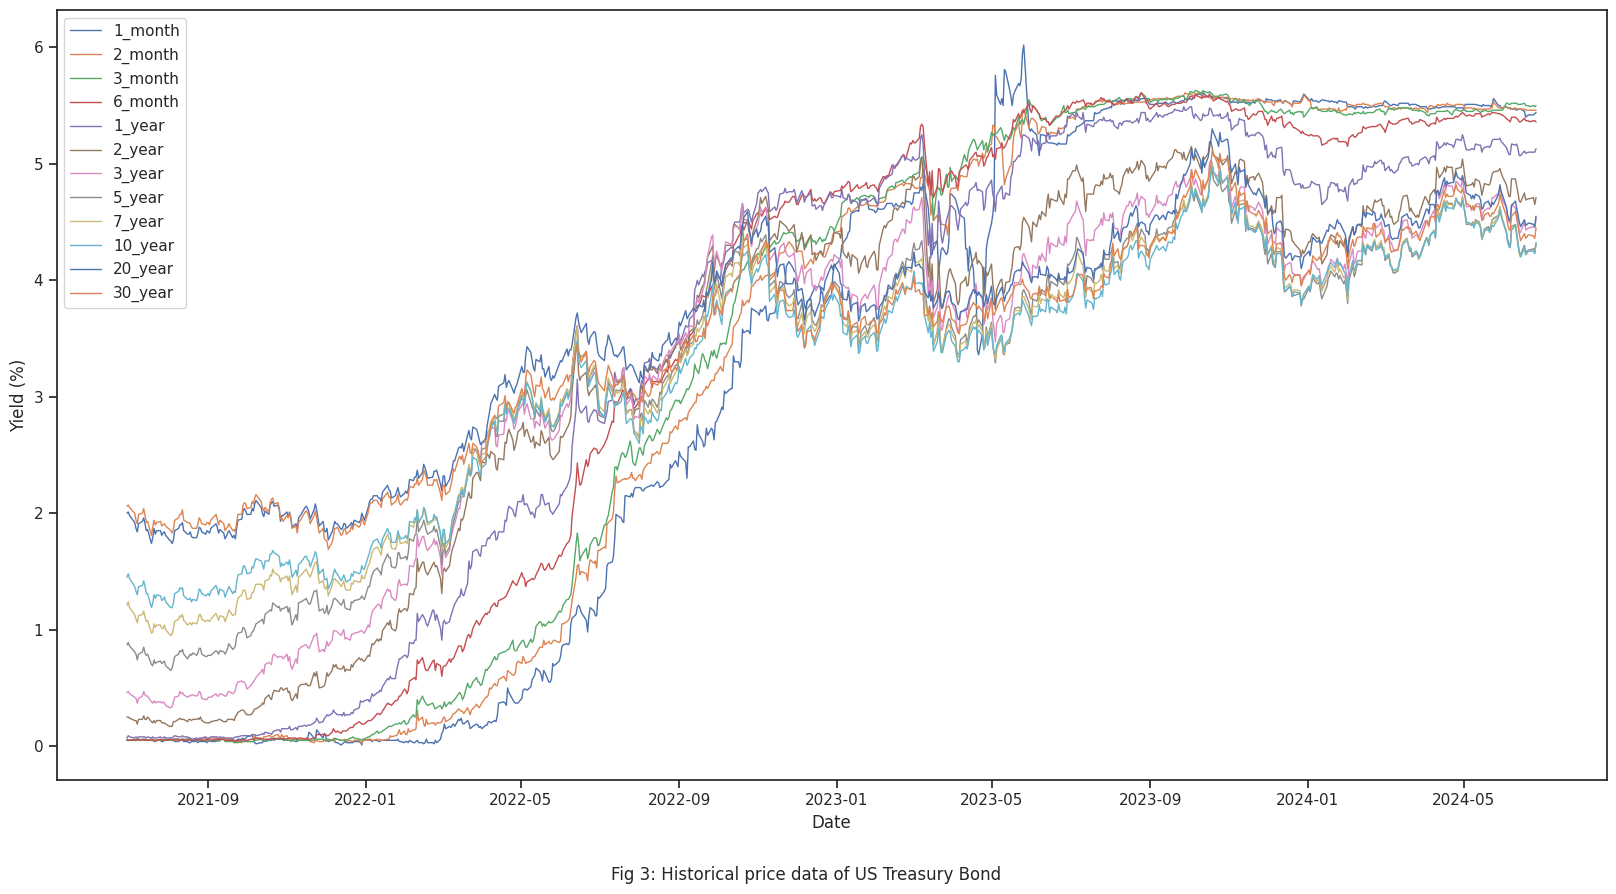

In [5]:
plotBond(bonds)

### Plot Top 10 stocks

The top ten stocks are selected based on the highest volume for the current day, and their historical data is presented.

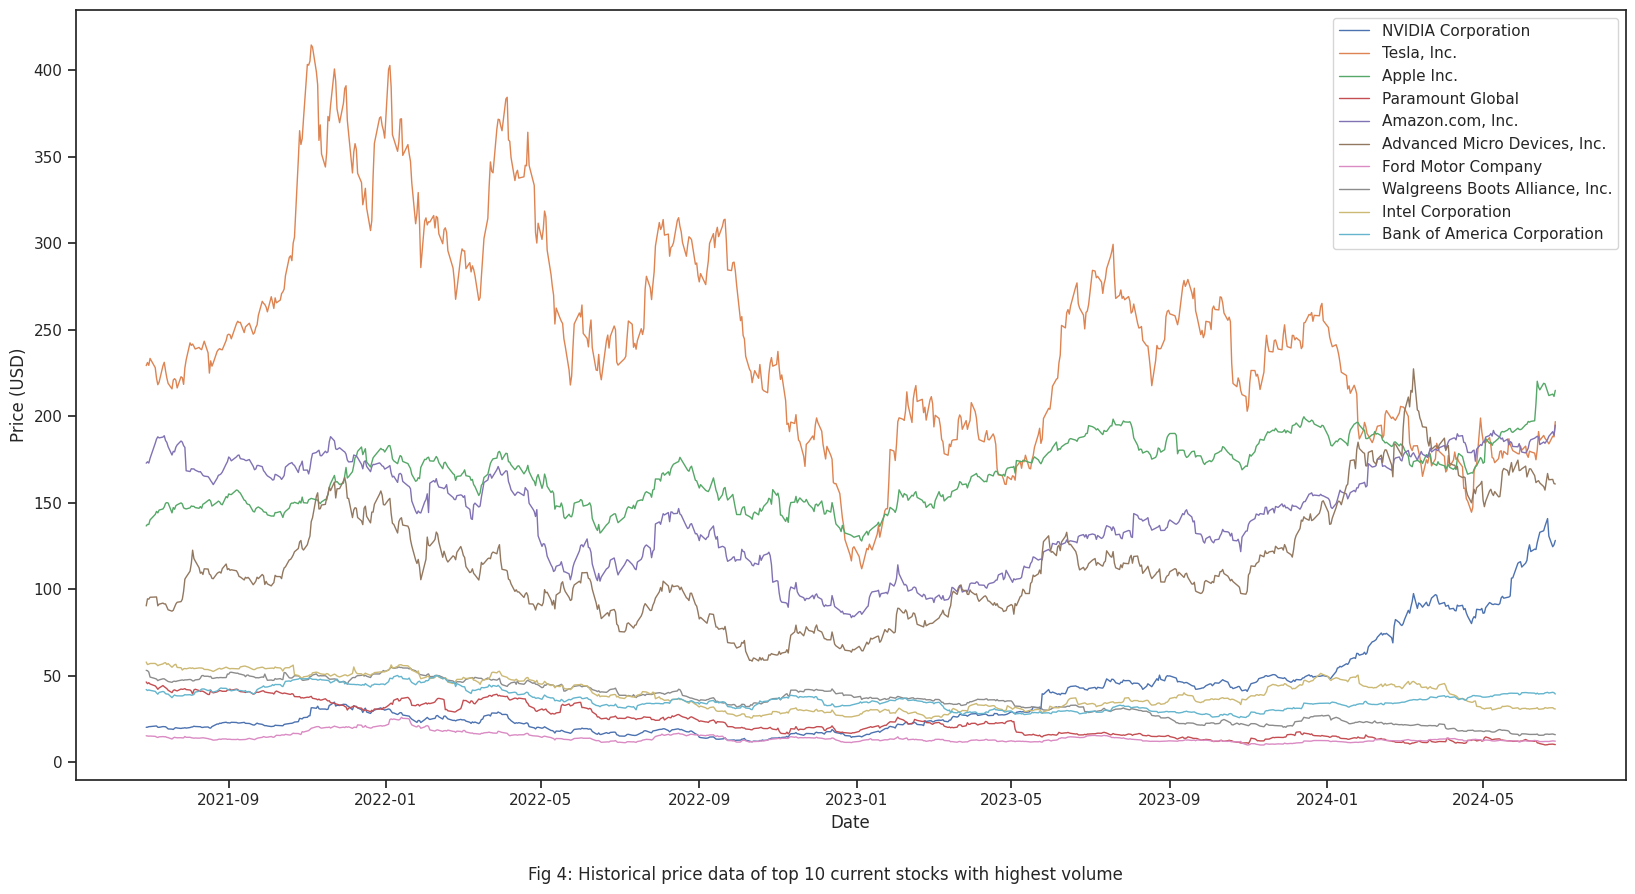

In [6]:
plotTopStocks(topStocks)

### Plot selected stocks graph

These are the stocks that we selected previously.

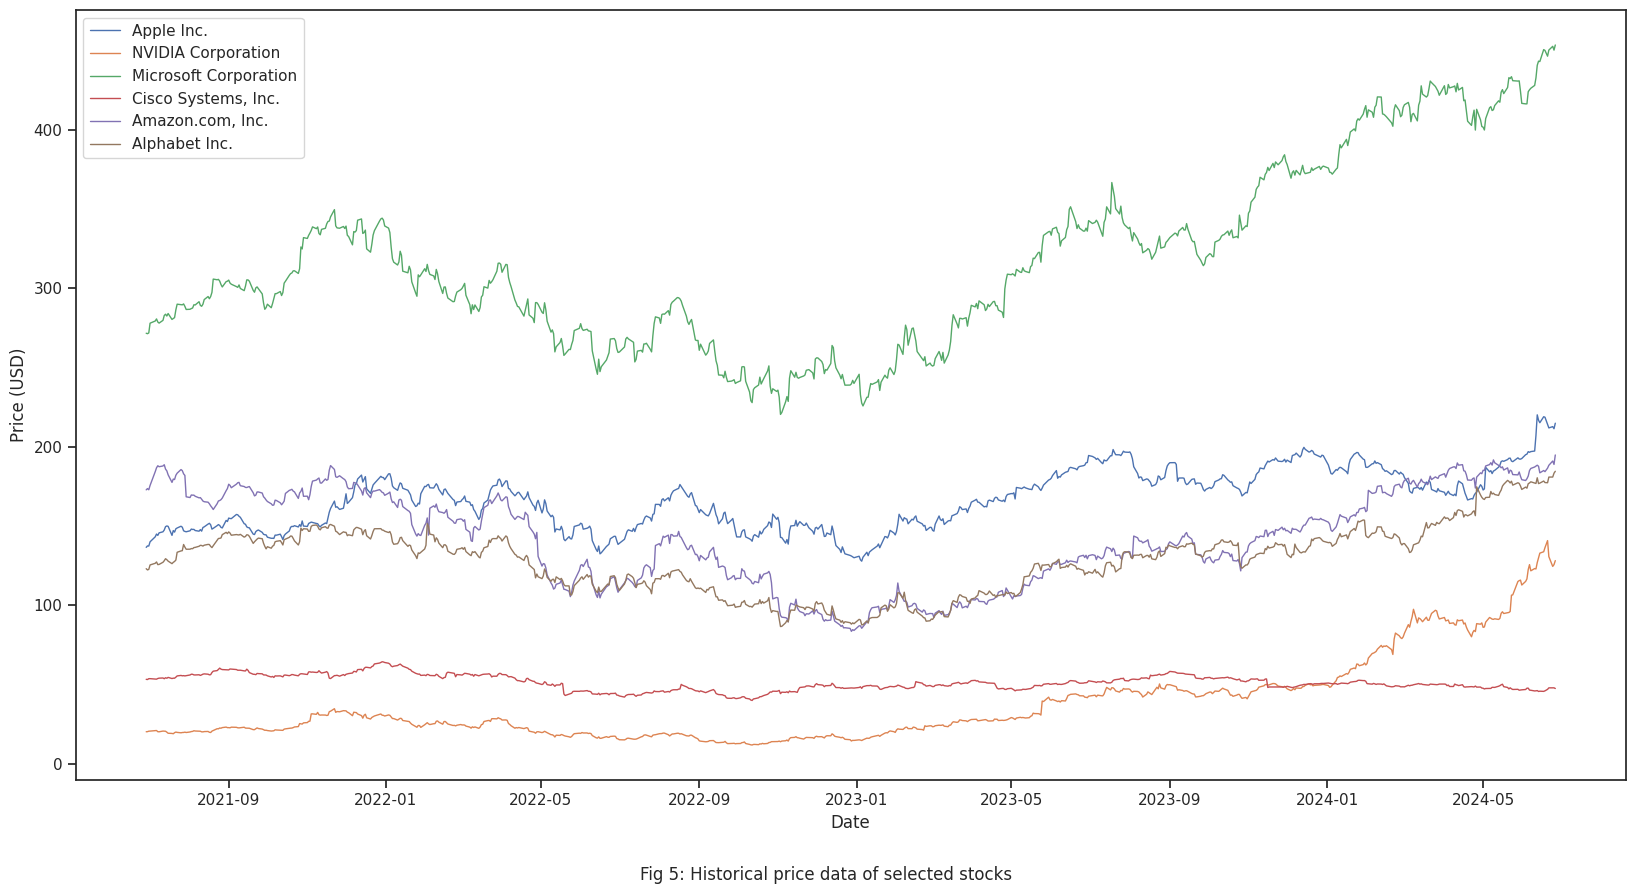

In [7]:
plotSelectedStocks(stocks)

## Data Extraction and Merging

At this step, the data is prepared for training the machine learning algorithm. It consists of the following steps:  
1. Sourcing demographics data for each stock. The demographics data includes price-to-earnings ratio, price to book ratio, debt to net equity ratio, free cash flow, Price/Earnings-to-Growth ratio, and return on equity.
2. Fetching historical data for all stocks from the database.
3. Fetching historical data for all indexes, commodities, and bonds from the database.
4. Merging indexes, commodities, and bonds based on date.
5. Concatenating demographics data with stocks values.
6. Appending the merged indexes, commodities, and bonds with stocks values based on date.
7. Adding additional flags for parameters such as day of the week, holiday, and time of day. These provide additional context to improve the ML algorithm accuracy.
8. One Hot Encoding to encode the data for training the ML algorithm.
9. Saving preprocessed data.

In [ ]:
%run ./DataExtractionMerging.ipynb
# Firewall blocking DNS

## Stock price forecast

In this section, we will generate a prediction and analyze the accuracy of the ML model prediction.

In [27]:
%run ./Prediction.ipynb

### Load dataset and filter

Select the stocks to generate the prediction for by adding their symbol to the "symbols" list.  
*[List of stocks](./stocksList.ipynb)*  

In [2]:
symbols = ['AAPL','NVDA','MSFT','CSCO','AMZN','GOOGL']
# Read data from csv
df = loadDataset()
# Filter dataframe with selected symbols
df = filterDataset(symbols, df)
# Preprocess dataframe fields
df, DATETIME = preprocess(df)

### Train model and generate prediction

Configure the parameters for training the model:
1. trainingDateStart: The starting date of the stock's historical values to train the model on.
2. predictionDateStart: The starting date of the required prediction timeframe. This is also the end of the stock's historical values to train the model on.
3. predictionDateEnd: The ending date of the required prediction timeframe.
4. daysToPredict: Number of days to predict the stock values at each inference of the model within the prediction timeframe.

For this demo, the prediction window is in the past for allowing us to compare the predicted values with the actual values.  
Please wait for the prediction countdown to end as it may take a few minutes based on the training and prediction window.

In [3]:
# Input data
trainingDateStart = '2019-06-26'
predictionDateStart = '2024-01-15'
predictionDateEnd = '2024-06-15'
daysToPredict = 5

# Generate prediction
result = trainModel(trainingDateStart,predictionDateStart, predictionDateEnd, daysToPredict)

/home/research/Jupyter/.venv/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:32:08] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
/tmp/ipykernel_422321/3954145637.py:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, data], ignore_index=True)


Count Down: 20
Count Down: 19
Count Down: 18
Count Down: 17
Count Down: 16
Count Down: 15
Count Down: 14
Count Down: 13
Count Down: 12
Count Down: 11
Count Down: 10
Count Down: 9
Count Down: 8
Count Down: 7
Count Down: 6
Count Down: 5
Count Down: 4
Count Down: 3
Count Down: 2
Count Down: 1
Count Down: 0


## Prediction Result Analysis

A comparison between the predicted and actual values for the selected stocks.

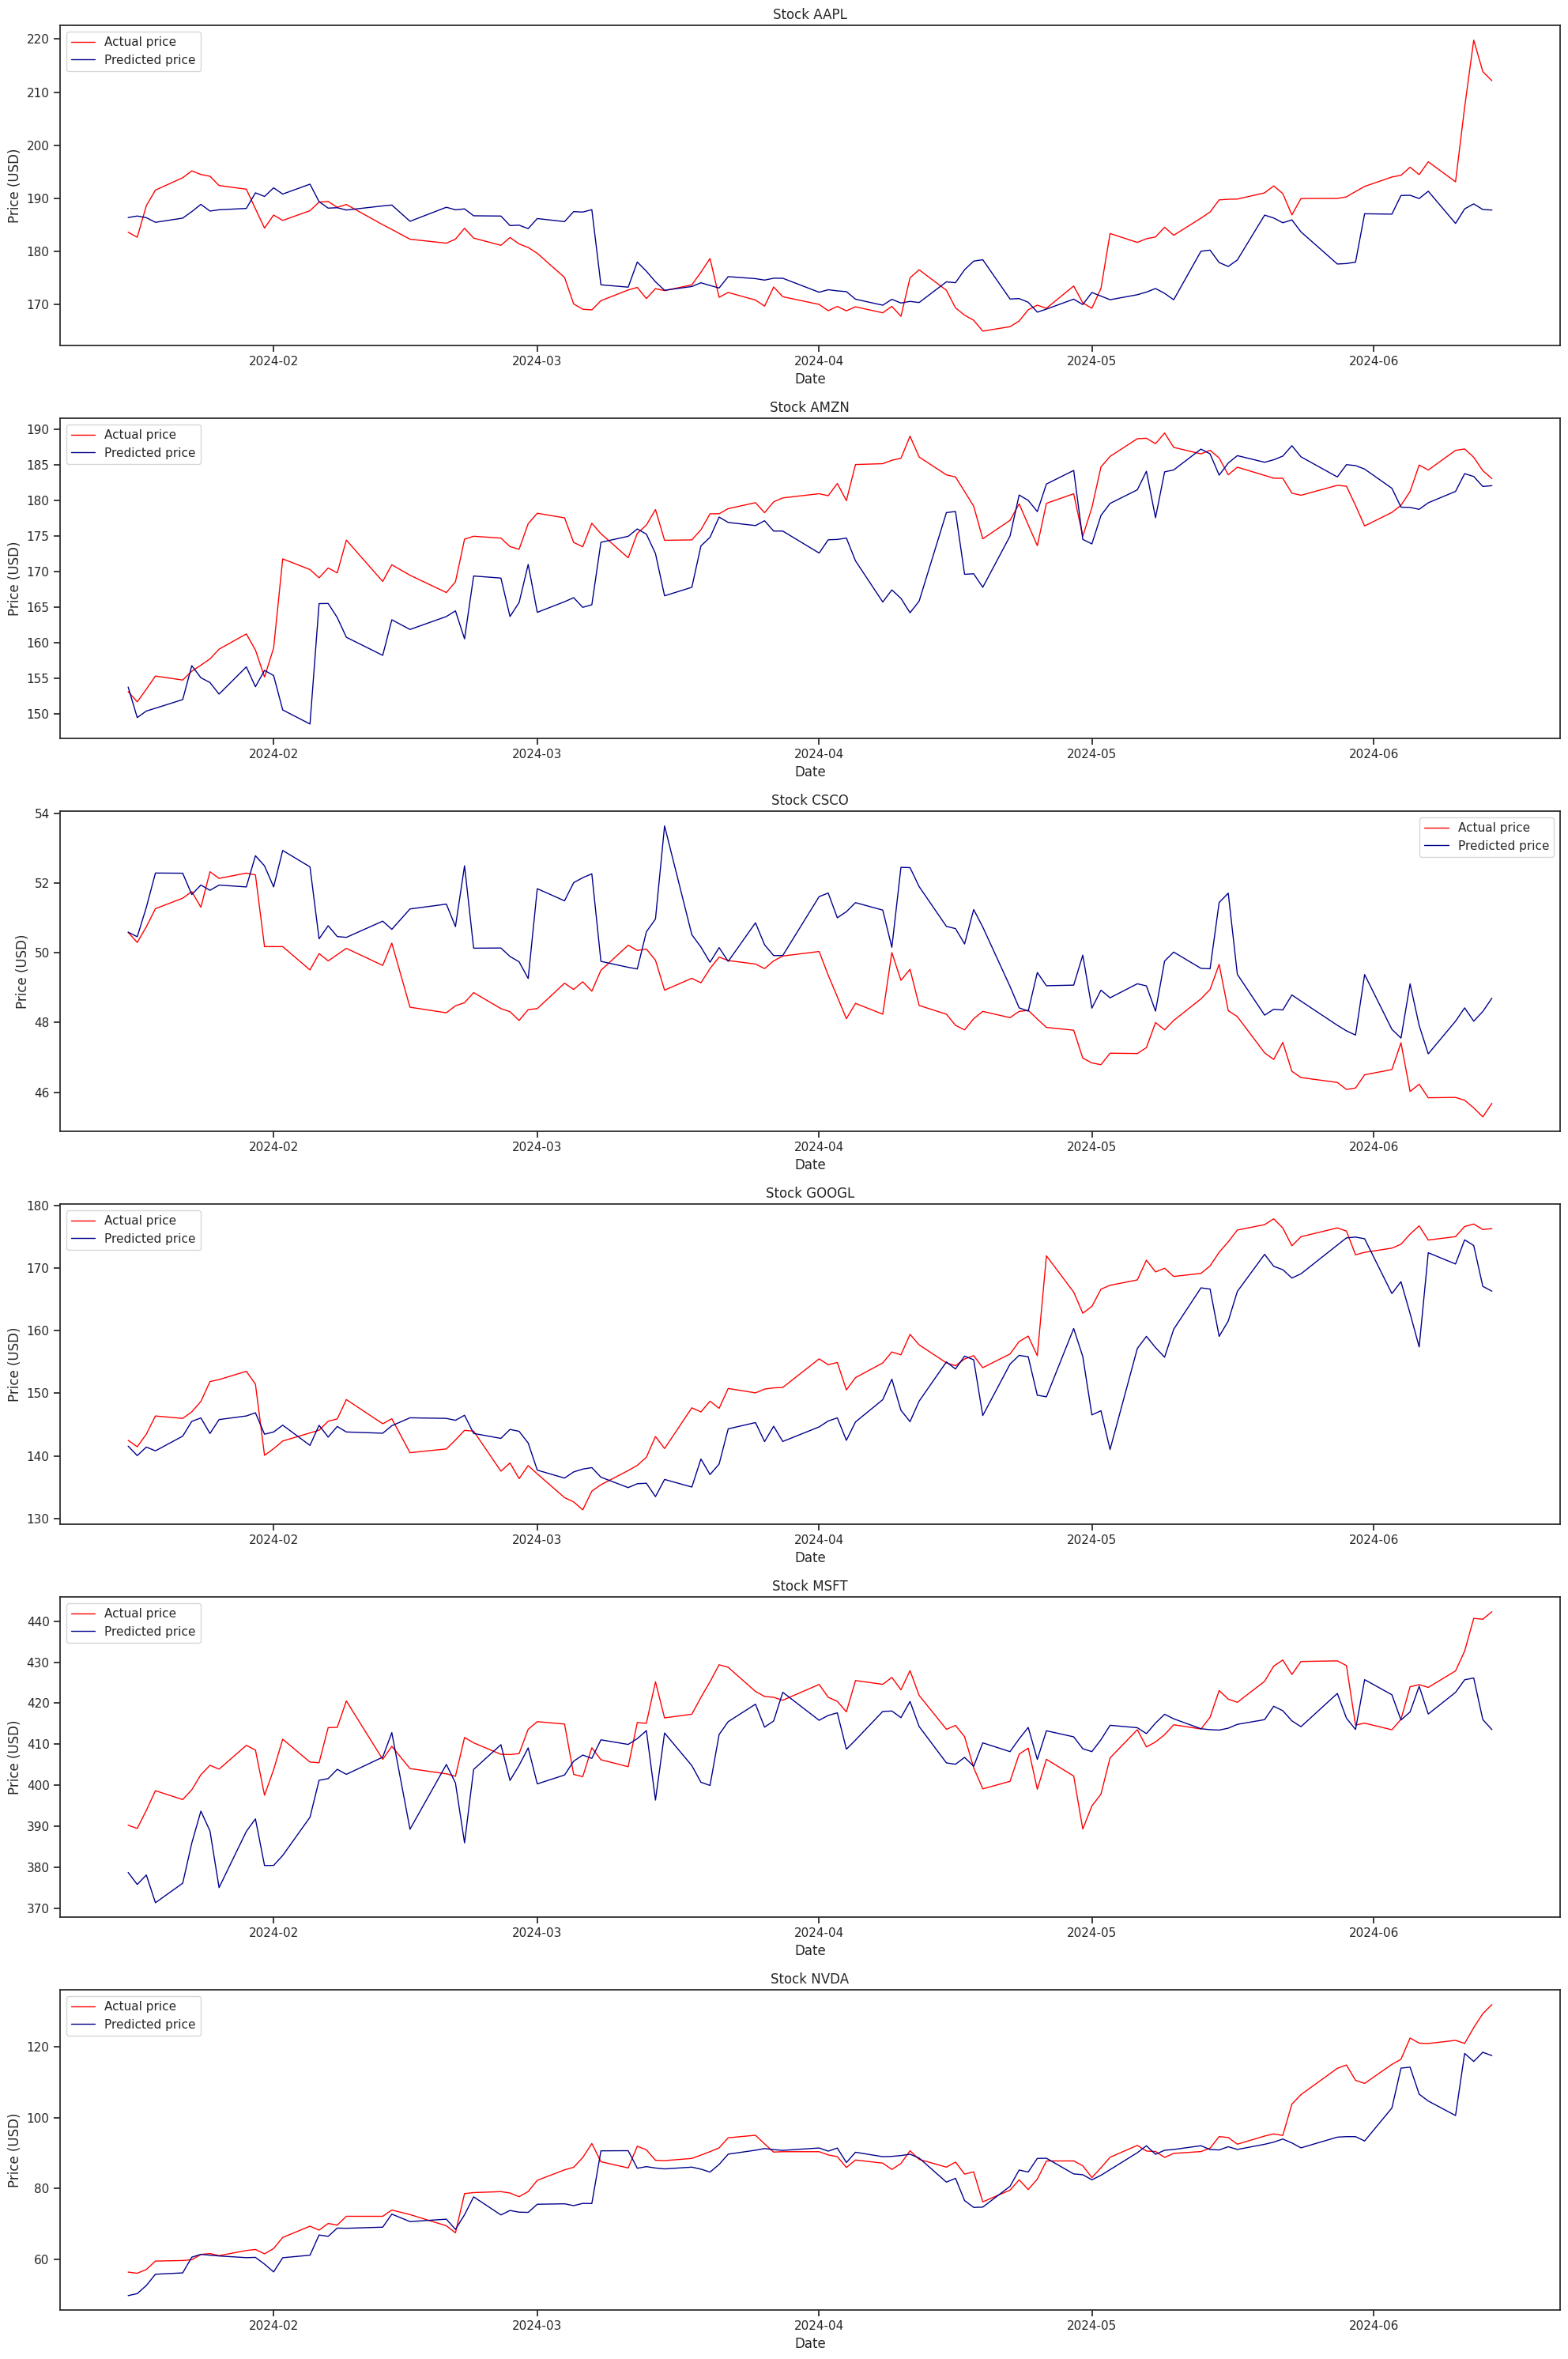

In [4]:
plotPrediction(result)

## Prediction Metrics Analysis

Analyses of the prediction accuracy based on the followin metrics:  
1. RMSE: Root Mean Square Error
2. MAPE: Mean Absolute Percentage Error
3. MPE: Mean Positive Error

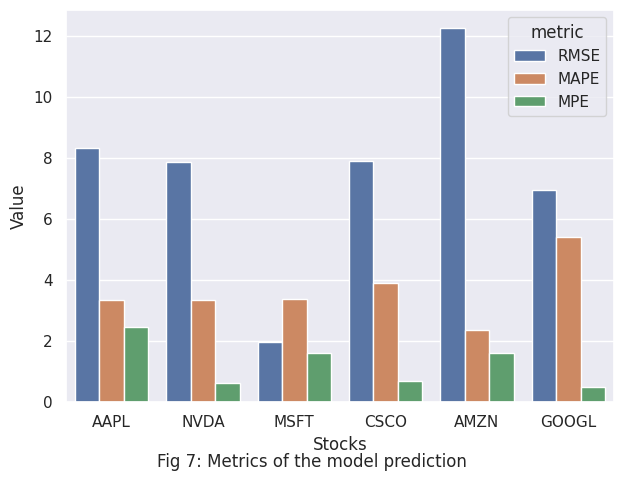

In [9]:
metrics_df = calculateMetrics(result)
melted_df = meltMetrics(metrics_df)
plotMetrics(metrics_df)

## Performance Analysis

This section provides insight into computation performace. The device being used, model inferences and time per inference point are provided for analysis.

In [31]:
gpuInfo()

GPU: NVIDIA GeForce RTX 4090
Memory: 24210GB
Number of multiprocessors: 128
Threads per multiprocessor: 1536


In [32]:
trainingStats(result, daysToPredict)

Number of stocks: 6
Number of dates: 104
Number of inferences: 21


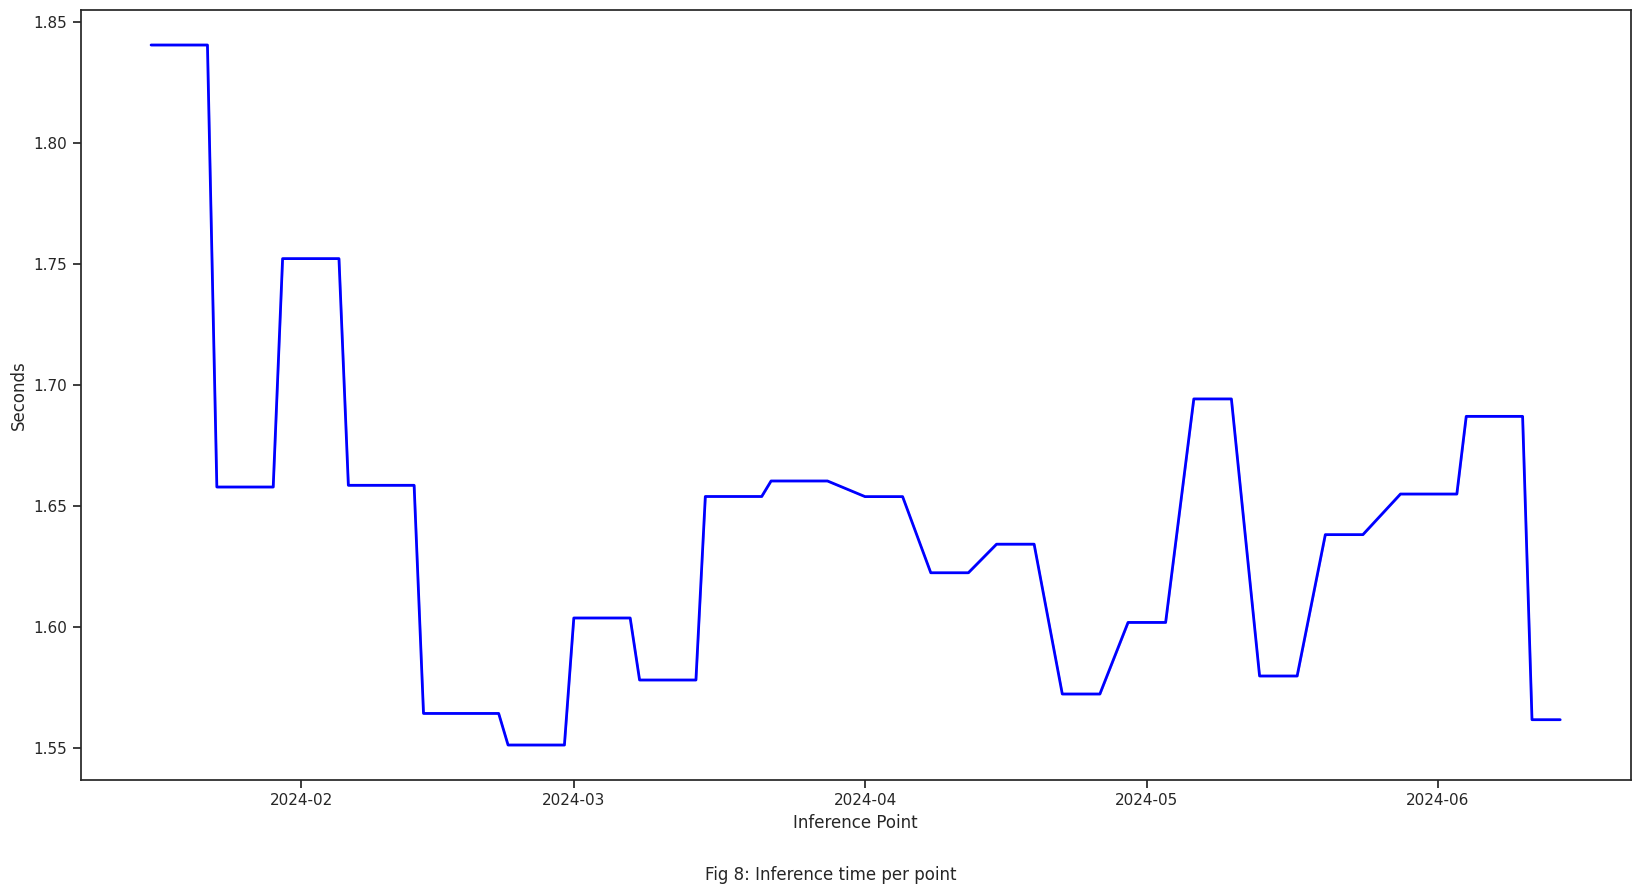

In [33]:
plotInferenceTime(result)